In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
df = pd.read_csv('emotional.csv', on_bad_lines='skip')
traindata = pd.read_csv('trainemotional.csv')
testdata = pd.read_csv('testemotional.csv')

In [45]:
df.head()

,User_ID,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
0,10,31,Male,Instagram,170,5,80,20,35,Happiness
1,877,32,Female,Instagram,155,6,75,25,38,Happiness
2,230,26,Non-binary,Facebook,45,1,8,4,12,Sadness
3,876,28,Non-binary,Snapchat,115,3,38,18,27,Anxiety
4,376,28,Non-binary,Snapchat,115,3,38,18,27,Anxiety


In [46]:
df.columns


Index(['User_ID', 'Age', 'Gender', 'Platform', 'Daily_Usage_Time (minutes)',
       'Posts_Per_Day', 'Likes_Received_Per_Day', 'Comments_Received_Per_Day',
       'Messages_Sent_Per_Day', 'Dominant_Emotion'],
      dtype='object')

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   User_ID                     145 non-null    int64 
 1   Age                         145 non-null    object
 2   Gender                      145 non-null    object
 3   Platform                    145 non-null    object
 4   Daily_Usage_Time (minutes)  145 non-null    int64 
 5   Posts_Per_Day               145 non-null    int64 
 6   Likes_Received_Per_Day      145 non-null    int64 
 7   Comments_Received_Per_Day   145 non-null    int64 
 8   Messages_Sent_Per_Day       145 non-null    object
 9   Dominant_Emotion            144 non-null    object
dtypes: int64(5), object(5)
memory usage: 11.5+ KB


In [48]:
# Its looks like there is no any null values in the dataset as seen from above output 
# Lets Check again
df.isnull().sum()

User_ID                       0
Age                           0
Gender                        0
Platform                      0
Daily_Usage_Time (minutes)    0
Posts_Per_Day                 0
Likes_Received_Per_Day        0
Comments_Received_Per_Day     0
Messages_Sent_Per_Day         0
Dominant_Emotion              1
dtype: int64

In [49]:
df = df.dropna()

In [50]:
# Its looks like there is no any null values in the dataset as seen from above output 
# Lets Check again
df.isnull().sum()

User_ID                       0
Age                           0
Gender                        0
Platform                      0
Daily_Usage_Time (minutes)    0
Posts_Per_Day                 0
Likes_Received_Per_Day        0
Comments_Received_Per_Day     0
Messages_Sent_Per_Day         0
Dominant_Emotion              0
dtype: int64

In [51]:
df.duplicated().sum()
print(f'The number of duplicates rows in the dataset are: ', df.duplicated().sum())

The number of duplicates rows in the dataset are:  7


In [52]:
# Drop these duplicates 
df.drop_duplicates(inplace=True)

In [53]:
# Lets check again
df.duplicated().sum()
print(f'The number of duplicates rows in the dataset are: ', df.duplicated().sum())

The number of duplicates rows in the dataset are:  0


In [54]:
# Lets check the datatype of every column
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 137 entries, 0 to 144
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   User_ID                     137 non-null    int64 
 1   Age                         137 non-null    object
 2   Gender                      137 non-null    object
 3   Platform                    137 non-null    object
 4   Daily_Usage_Time (minutes)  137 non-null    int64 
 5   Posts_Per_Day               137 non-null    int64 
 6   Likes_Received_Per_Day      137 non-null    int64 
 7   Comments_Received_Per_Day   137 non-null    int64 
 8   Messages_Sent_Per_Day       137 non-null    object
 9   Dominant_Emotion            137 non-null    object
dtypes: int64(5), object(5)
memory usage: 11.8+ KB


In [55]:
# Check the string values in the Age column
df['Age'].unique()

array(['31', '32', '26', '28', '35', '25', '27', '24', '33', 'Female',
       '29', '21', '23', '34', '22', 'Male'], dtype=object)

In [56]:
# As we can see that it contains 'Male' value that is string 
df['Age'].value_counts()

Age
28        14
26        14
24        13
27        11
31        10
25         9
29         9
33         8
23         8
22         8
Female     8
21         8
34         5
32         4
35         4
Male       4
Name: count, dtype: int64

In [57]:
# Lets convert the Age column datatype into numeric
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

In [58]:
# Lets check the null values in the Age column
df['Age'].isnull().sum()
print(f'The number of null values in the Age column are: ', df['Age'].isnull().sum())

The number of null values in the Age column are:  12


In [59]:
# Lets fill the null values with the average of the Age column
df.fillna(df['Age'].mean(), inplace=True)

In [60]:
df['Age'] = df['Age'].astype('int64')

In [61]:
# Lets again check the null values in the Age column
df['Age'].isnull().sum()
print(f'The number of null values in the Age column are: ', df['Age'].isnull().sum())

The number of null values in the Age column are:  0


In [62]:
df['Gender'].unique()

array(['Male', 'Female', 'Non-binary', '24', '33', '34', '28', '22', '26'],
      dtype=object)

In [63]:
df[df['Gender'] == '27']

,User_ID,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion


In [64]:
# Now Lets check for Marie keyword
df['Gender'].value_counts()

Gender
Non-binary    51
Female        43
Male          31
24             3
33             2
34             2
28             2
22             2
26             1
Name: count, dtype: int64

In [65]:
# Lets fill it with the name of 'Male'
df['Gender']=df['Gender'].replace('24', 'Male')

In [66]:
# Lets fill it with the name of 'Male'
df['Gender']=df['Gender'].replace('33', 'Male')

In [67]:
# Lets fill it with the name of 'Male'
df['Gender']=df['Gender'].replace('34', 'Male')

In [68]:
# Lets fill it with the name of 'Male'
df['Gender']=df['Gender'].replace('28', 'Female')

In [69]:
# Lets fill it with the name of 'Male'
df['Gender']=df['Gender'].replace('22', 'Female')

In [70]:
# Lets fill it with the name of 'Male'
df['Gender']=df['Gender'].replace('26', 'Female')

In [71]:
df['Gender'].value_counts()

Gender
Non-binary    51
Female        48
Male          38
Name: count, dtype: int64

In [72]:
df.head()

,User_ID,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
0,10,31,Male,Instagram,170,5,80,20,35,Happiness
1,877,32,Female,Instagram,155,6,75,25,38,Happiness
2,230,26,Non-binary,Facebook,45,1,8,4,12,Sadness
3,876,28,Non-binary,Snapchat,115,3,38,18,27,Anxiety
4,376,28,Non-binary,Snapchat,115,3,38,18,27,Anxiety


In [73]:
df.groupby(['Gender', 'Platform'])['Daily_Usage_Time (minutes)'].mean().reset_index()

,Gender,Platform,Daily_Usage_Time (minutes)
0,Female,Facebook,66.250000
1,Female,Instagram,154.750000
2,Female,LinkedIn,80.000000
3,Female,Snapchat,79.166667
4,Female,Twitter,95.625000
5,Female,Whatsapp,100.000000
6,Male,Facebook,73.000000
7,Male,Instagram,134.111111
8,Male,LinkedIn,55.000000
9,Male,Snapchat,190.000000


C:\Users\Purva\AppData\Local\Temp\ipykernel_28652\3710069333.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




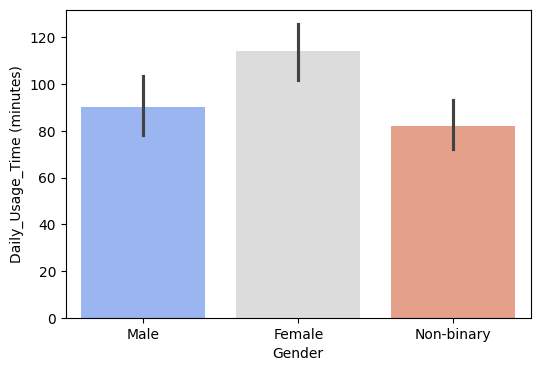

<Figure size 640x480 with 0 Axes>

In [84]:
plt.figure(figsize=(6, 4))
sns.barplot(x='Gender', y='Daily_Usage_Time (minutes)', data=df, palette='coolwarm')
plt.show()
plt.savefig('figure2.png', format='png')

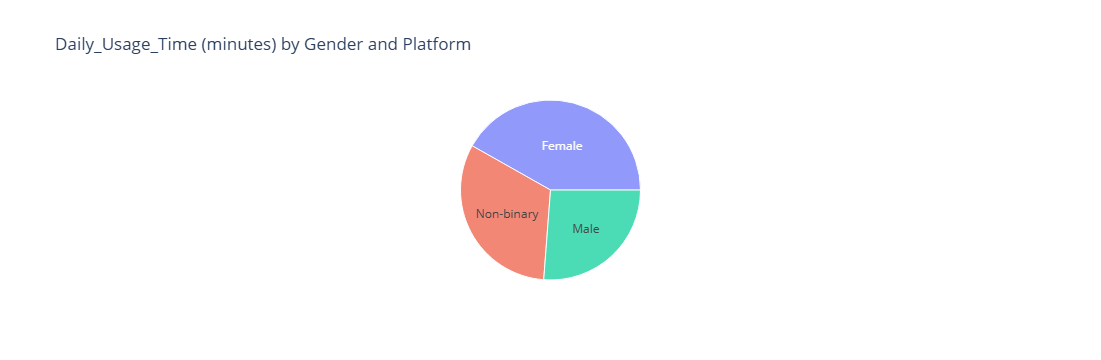

In [75]:
# For more information about this
import plotly.express as py
py.sunburst(df, path=['Gender'], values='Daily_Usage_Time (minutes)', title='Daily_Usage_Time (minutes) by Gender and Platform')


In [76]:
group = df.groupby(['Gender', 'Platform'])['Daily_Usage_Time (minutes)'].mean().reset_index()
group

,Gender,Platform,Daily_Usage_Time (minutes)
0,Female,Facebook,66.250000
1,Female,Instagram,154.750000
2,Female,LinkedIn,80.000000
3,Female,Snapchat,79.166667
4,Female,Twitter,95.625000
5,Female,Whatsapp,100.000000
6,Male,Facebook,73.000000
7,Male,Instagram,134.111111
8,Male,LinkedIn,55.000000
9,Male,Snapchat,190.000000


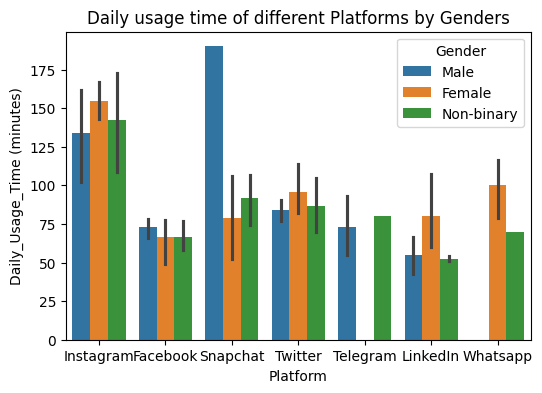

In [83]:
plt.figure(figsize=(6,4))
sns.barplot(x='Platform',y='Daily_Usage_Time (minutes)',hue='Gender',data=df)
plt.title('Daily usage time of different Platforms by Genders')
plt.savefig('figure1.png', format='png')

In [78]:
# Step 1: Group by Platform and calculate mean Age for each platform
platform_usage_count = df.groupby('Platform').size().reset_index(name='User Count')

# Sort by the 'User Count' to show which platform is used the most
platform_usage_count_sorted = platform_usage_count.sort_values(by='User Count', ascending=False)

# Print the result
print(platform_usage_count_sorted)

    Platform  User Count
1  Instagram          36
0   Facebook          31
5    Twitter          22
2   LinkedIn          19
3   Snapchat          17
4   Telegram           7
6   Whatsapp           5


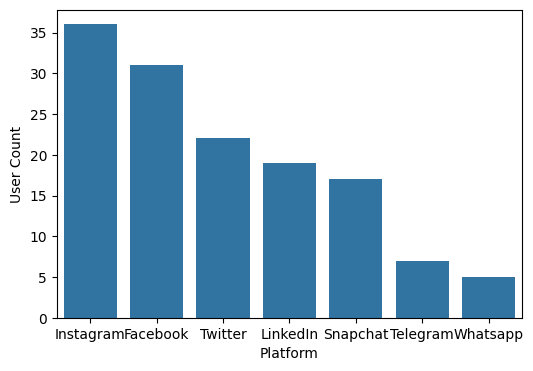

In [82]:
plt.figure(figsize=(6,4))
sns.barplot(
    x='Platform', 
    y='User Count', 
    data=platform_usage_count_sorted, 
)
plt.savefig('figure.png', format='png')

In [39]:
df.groupby(df['Age'])['Posts_Per_Day'].mean().reset_index()

,Age,Posts_Per_Day
0,21,1.875000
1,22,3.500000
2,23,2.375000
3,24,4.153846
4,25,5.777778
5,26,2.571429
6,27,3.739130
7,28,4.428571
8,29,2.222222
9,31,3.700000


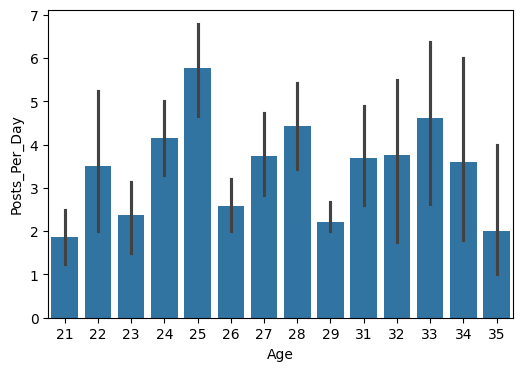

In [80]:
plt.figure(figsize=(6,4))
sns.barplot(x='Age',y='Posts_Per_Day',data=df)
plt.savefig('postage.png', format='png')

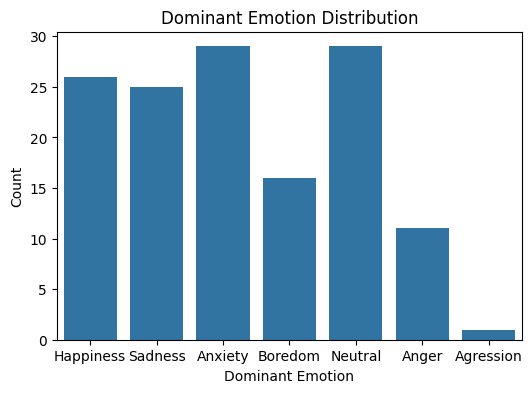

<Figure size 640x480 with 0 Axes>

In [81]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Dominant_Emotion', data=df)
plt.title('Dominant Emotion Distribution')
plt.xlabel('Dominant Emotion')
plt.ylabel('Count')
plt.show()
plt.savefig('dominantemo.png', format='png')